In [2]:
import os
import xarray as xr
import numpy as np
import metpy
import metpy.calc as mpcalc
from metpy.units import units
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from PIL import Image
%matplotlib inline

In [3]:
inpath = '/home/disk/flood2/synoptic/class/atm502/project2022/data/era5/'
storm_folder = '20151116_20151119'
files = [file for file in os.listdir(os.path.join(inpath,storm_folder))]
files

['era5.data_on_single_levels.2015111600_2015111921.nc',
 'era5.data_on_pressure_levels.2015111600_2015111921.nc',
 'era5.data_on_pv_levels.2015111600_2015111921.nc_old',
 'era5.data_on_pv_levels.2015111600_2015111921.nc']

In [4]:
ds3 = xr.open_dataset(os.path.join(inpath,storm_folder,files[-1]))
ds3_subset = ds3.sel(time=np.datetime64('2015-11-17T00:00:00')).metpy.parse_cf()
ds3_subset

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 2015-11-17
    metpy_crs  object Projection: latitude_longitude
Data variables:
    pt         (latitude, longitude) float32 ...
    pres       (latitude, longitude) float32 ...
    z          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-29 05:53:39 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [5]:
ds2 = xr.open_dataset(os.path.join(inpath,storm_folder,files[0]))

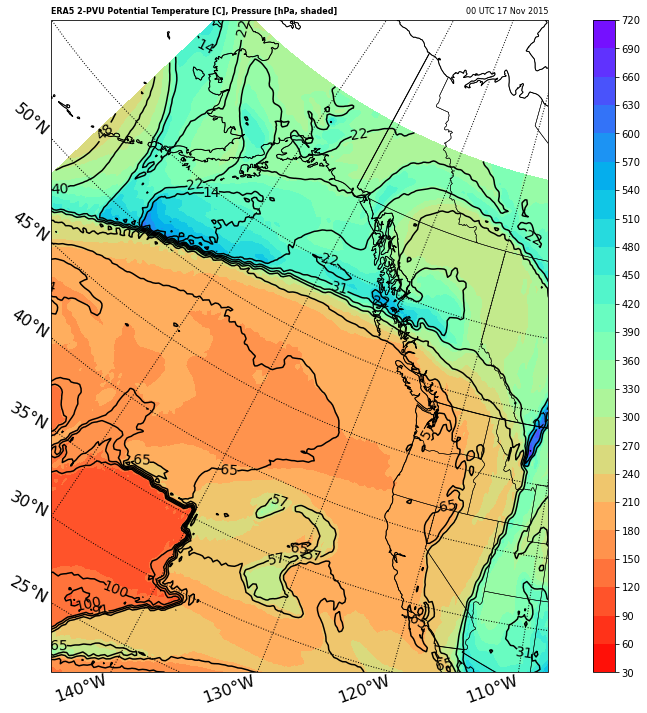

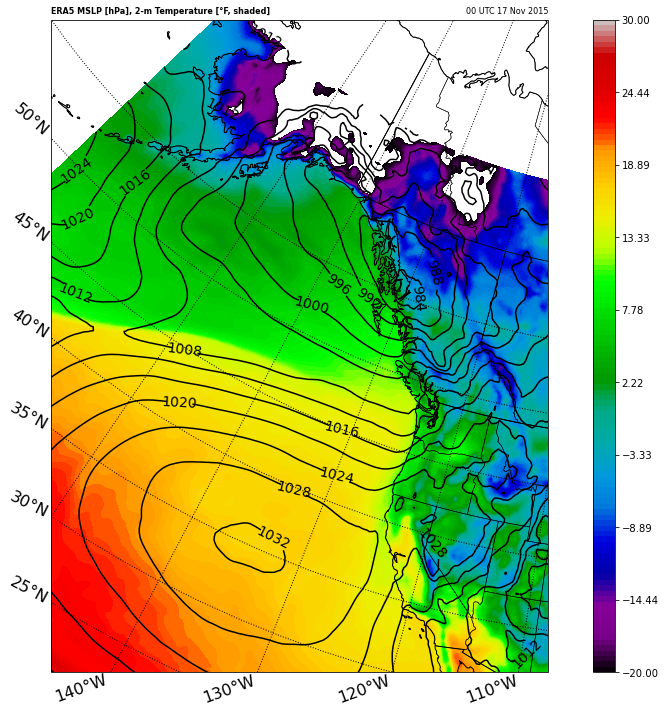

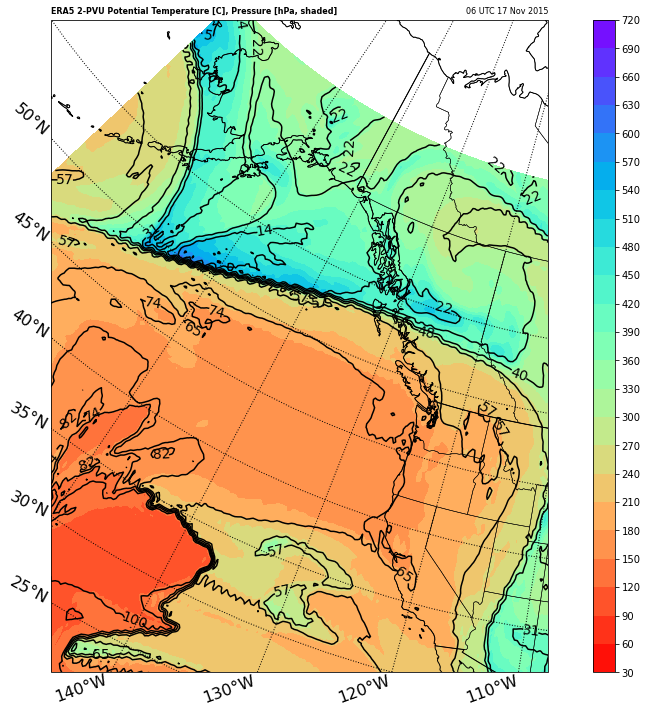

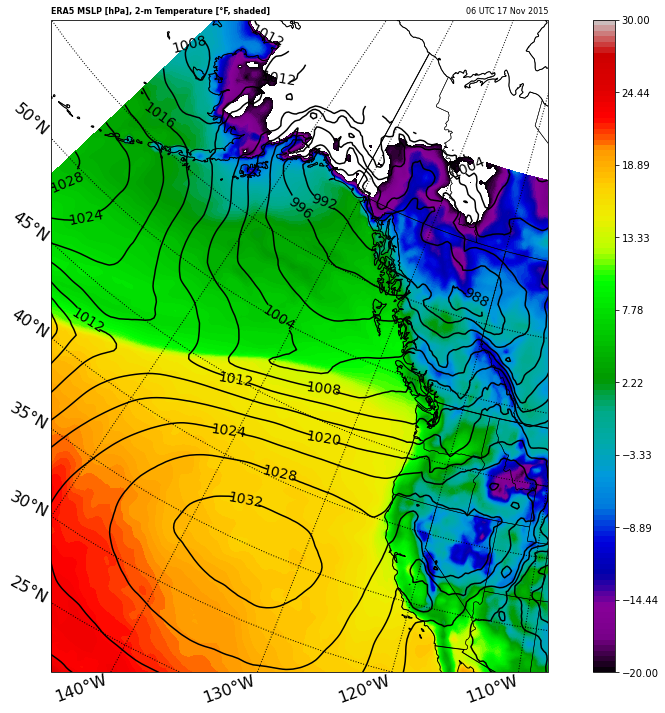

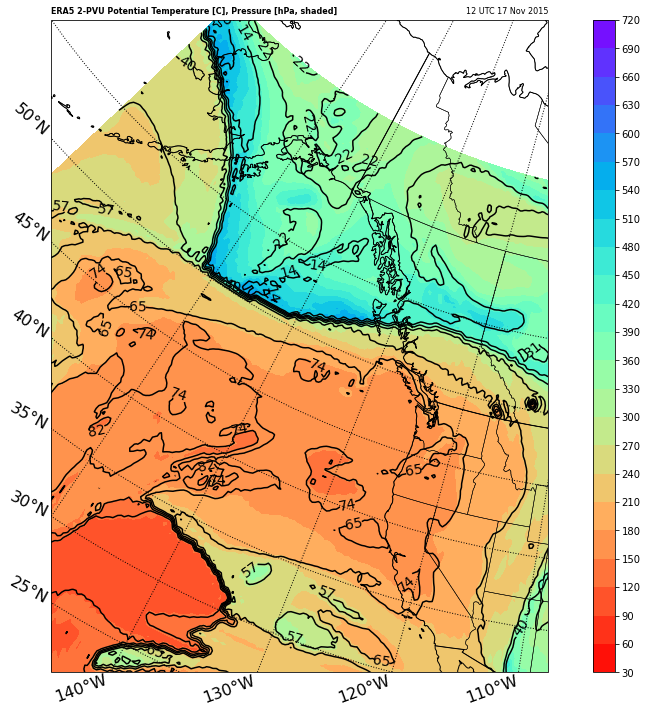

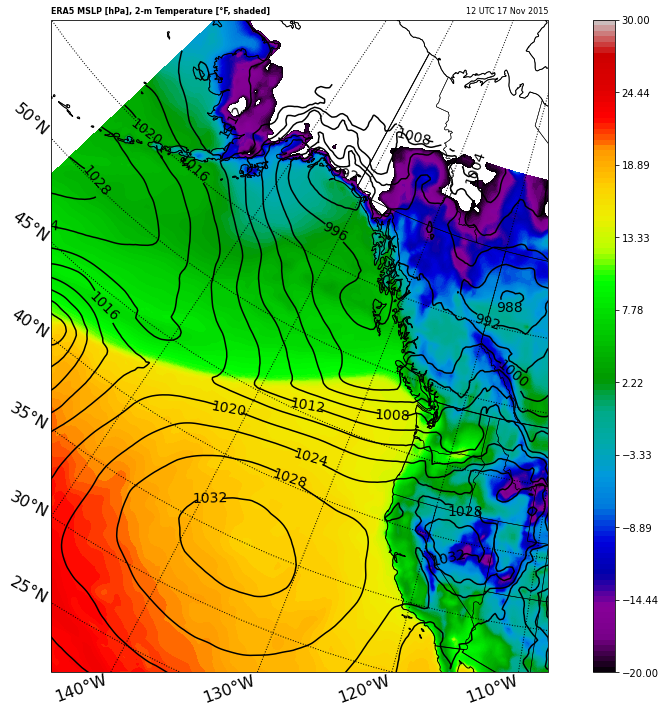

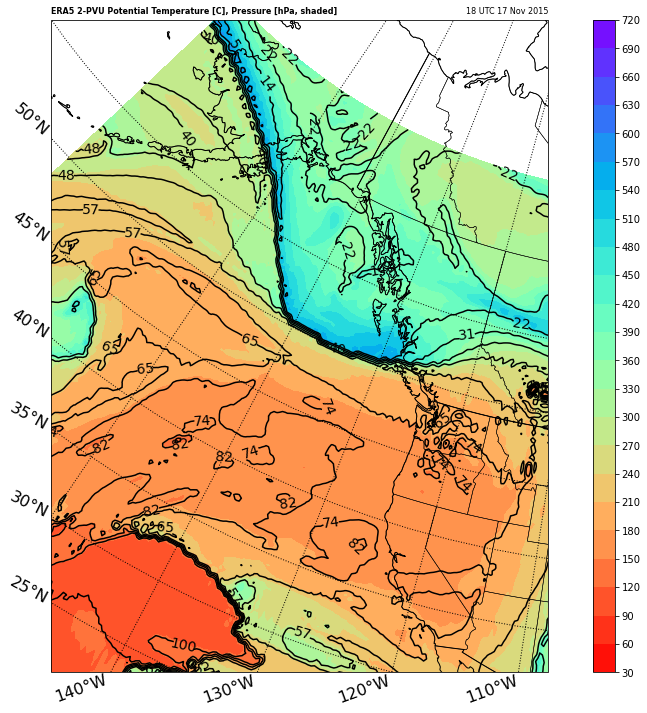

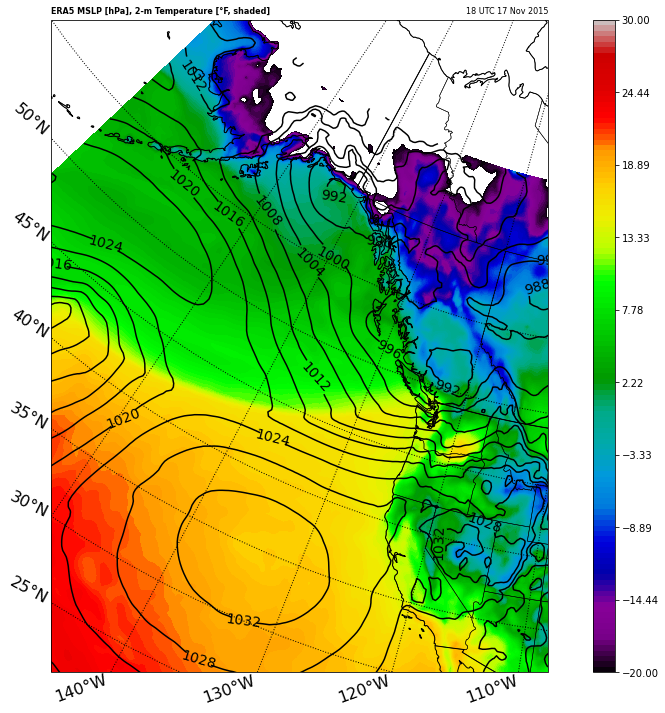

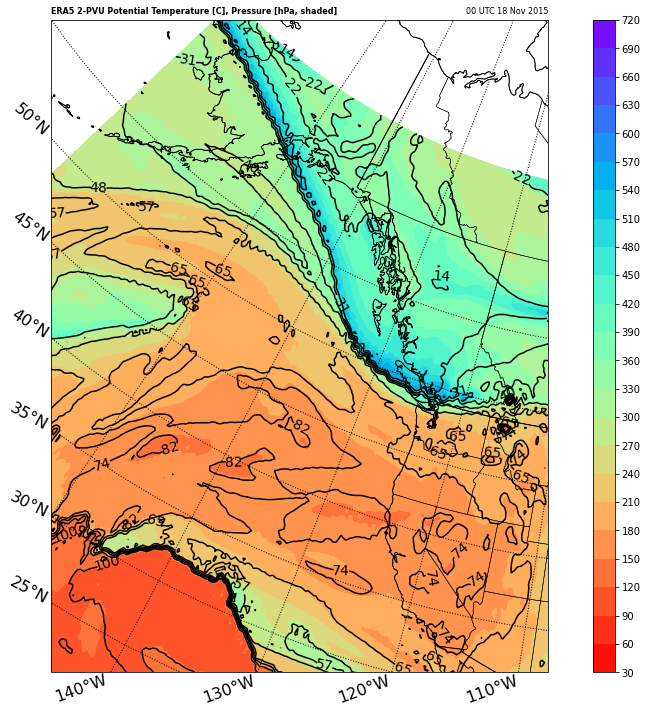

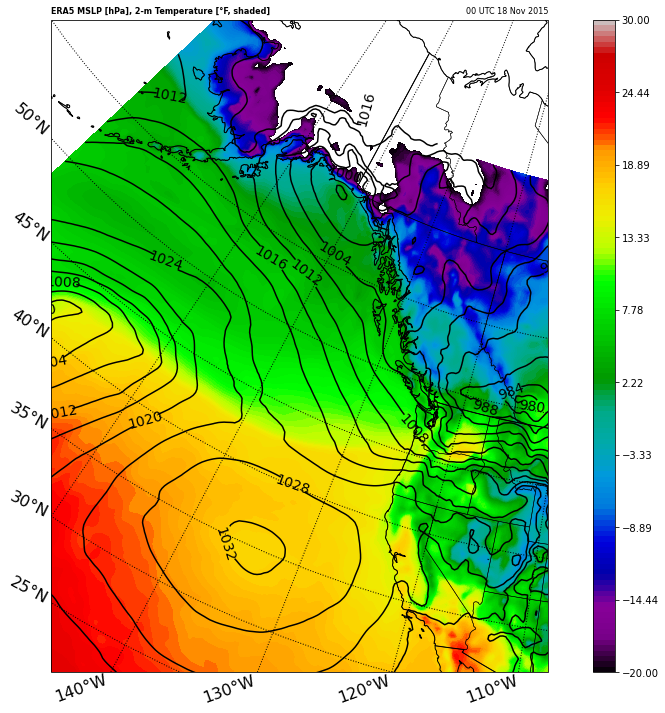

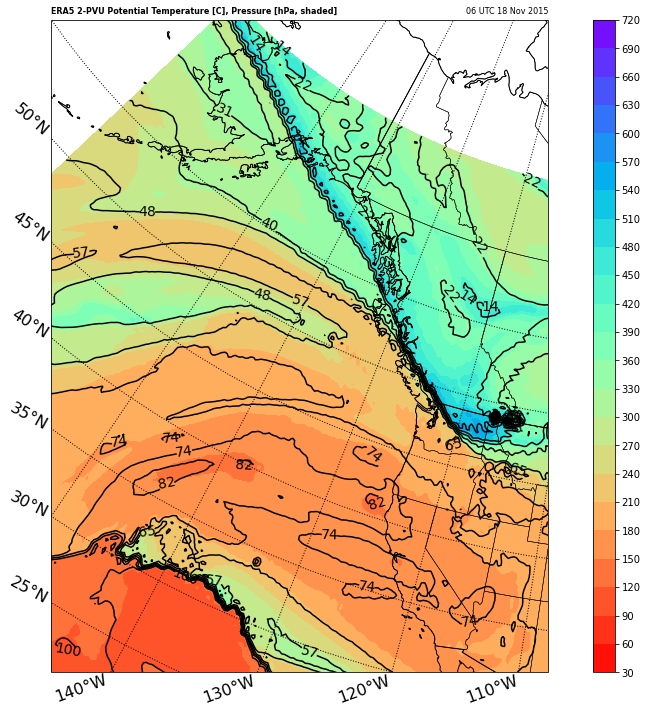

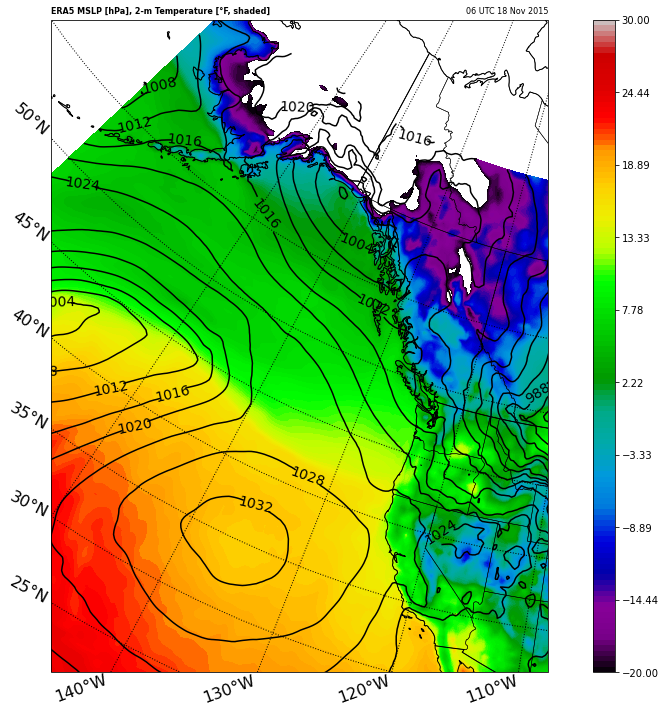

In [6]:
extent = [-150, -120, 30, 70]
times = ['2015-11-17T00:00:00','2015-11-17T06:00:00','2015-11-17T12:00:00','2015-11-17T18:00:00','2015-11-18T00:00:00','2015-11-18T06:00:00']
for i,time in enumerate(times):    
    fig1 = plt.figure(figsize=(16, 12))
    
    ds2_subset = ds2.sel(time=time).metpy.parse_cf()
    # Assign MSLP and 2-m temperature
    mslp = ds2_subset['msl'].metpy.quantify()
    t2m = ds2_subset['t2m'].metpy.quantify()
    
    ds3_subset = ds3.sel(time=np.datetime64(time)).metpy.parse_cf()    
    # Assign DT theta and pressure
    pt2pvu = ds3_subset['pt'].metpy.quantify()
    pres2pvu = ds3_subset['pres'].metpy.quantify()

    # Plotting commands for 2-PVU surface with potential temperature and pressure level of dynamic tropopause
    ax1 = fig1.add_subplot(111, projection=ccrs.LambertConformal())

    ax1.set_extent(extent)
    ax1.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
    ax1.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
    ax1.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='black')

    plt1 = ax1.contourf(
        pres2pvu['longitude'], pres2pvu['latitude'], pres2pvu.data.to('hPa'),
        levels=np.linspace(30, 720, 24), cmap='rainbow_r',
        transform=ccrs.PlateCarree())
    plt2 = ax1.contour(
        pt2pvu['longitude'], pt2pvu['latitude'], pt2pvu.data.to(units.celsius) ,
        levels=np.linspace(-20, 100, 15), colors='black', transform=ccrs.PlateCarree())
    ax1.clabel(plt2, np.linspace(-20, 100, 15), inline=True, fmt='%d', fontsize=14)

    cb = fig1.colorbar(plt1, ax=ax1, orientation='vertical', pad=0.05, aspect=30)
    cb.set_ticks(np.linspace(30, 720, 24))

    dt = datetime.utcfromtimestamp(pt2pvu['time'].values.astype(int) * 1e-9)
    ax1.set_title(
        'ERA5 2-PVU Potential Temperature [C], Pressure [hPa, shaded]',
        fontweight='bold', fontsize=8, loc='left')
    ax1.set_title(datetime.strftime(dt, '%H UTC %d %b %Y'), fontsize=8, loc='right')

    # # Format the gridlines (optional)
    gl = ax1.gridlines(
        crs=ccrs.PlateCarree(), draw_labels=True, dms=True, x_inline=False,
        y_inline=False, linewidth=1, color='k', linestyle=':')
    gl.xlocator = mticker.FixedLocator([-150,-140,-130,-120,-110,-100])
    gl.ylocator = mticker.FixedLocator([25, 30, 35, 40, 45,50,55])
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 16, 'rotation': 20}
    gl.ylabel_style = {'size': 16}

    # Plotting commands for figure 
    fig2 = plt.figure(figsize=(16, 12))
    
    ax2 = fig2.add_subplot(111, projection=ccrs.LambertConformal())
    ax2.set_extent(extent)
    ax2.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
    ax2.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
    ax2.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='black')

    plt1 = ax2.contourf(
        t2m['longitude'], t2m['latitude'], t2m.data.to(units.celsius),
        levels=np.linspace(-20, 30, 121), cmap='nipy_spectral',
        transform=ccrs.PlateCarree())
    plt2 = ax2.contour(
        mslp['longitude'], mslp['latitude'], mslp.data.to('hPa'),
        levels=np.linspace(940, 1040, 26), colors='black', transform=ccrs.PlateCarree())
    ax2.clabel(plt2, np.linspace(940, 1040, 26), inline=True, fmt='%d', fontsize=14)

    cb = fig2.colorbar(plt1, ax=ax2, orientation='vertical', pad=0.05, aspect=30)
    cb.set_ticks(np.linspace(-20, 30, 10))

    dt = datetime.utcfromtimestamp(mslp['time'].values.astype(int) * 1e-9)
    ax2.set_title(
        'ERA5 MSLP [hPa], 2-m Temperature [\u00b0F, shaded]',
        fontweight='bold', fontsize=8, loc='left')
    ax2.set_title(datetime.strftime(dt, '%H UTC %d %b %Y'), fontsize=8, loc='right')

    # # Format the gridlines (optional)
    gl = ax2.gridlines(
        crs=ccrs.PlateCarree(), draw_labels=True, dms=True, x_inline=False,
        y_inline=False, linewidth=1, color='k', linestyle=':')
    gl.xlocator = mticker.FixedLocator([-150,-140,-130,-120, -110, -100])
    gl.ylocator = mticker.FixedLocator([25, 30, 35, 40, 45,50,55])
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 16, 'rotation': 20}
    gl.ylabel_style = {'size': 16}
    
    fig1.savefig(f'PV_{time}.png')
    fig2.savefig(f'surf_{time}.png')
    
plt.show()


In [15]:
import os
import glob

fp_in = os.path.join(os.getcwd(),'figures/PV/*.png')

imgs = (Image.open(f) for f in glob.glob(fp_in))
img = next(imgs)  # extract first image from iterator
img.save(fp=os.path.join(os.getcwd(),'figures/gifs/pv.gif'), format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0)

In [16]:
fp_in = os.path.join(os.getcwd(),'figures/surface/*.png')

imgs = (Image.open(f) for f in glob.glob(fp_in))
img = next(imgs)  # extract first image from iterator
img.save(fp=os.path.join(os.getcwd(),'figures/gifs/surface.gif'), format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0)